In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
35,555 cases (7 day average) as of Wed 24 Nov, +183.7 since Tue 23 Nov
649 hospitalised (7 day average) as of Sat 27 Nov, -9.4 since Wed 24 Nov
93 died (7 day average) as of Wed 24 Nov, -2.9 since Tue 23 Nov


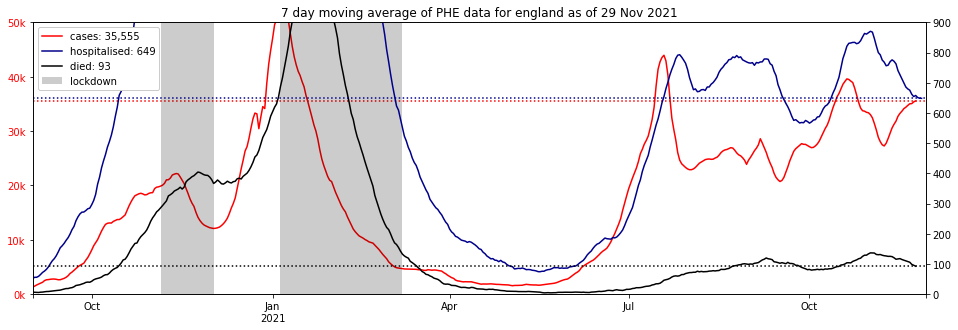

In [3]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=50_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=900)

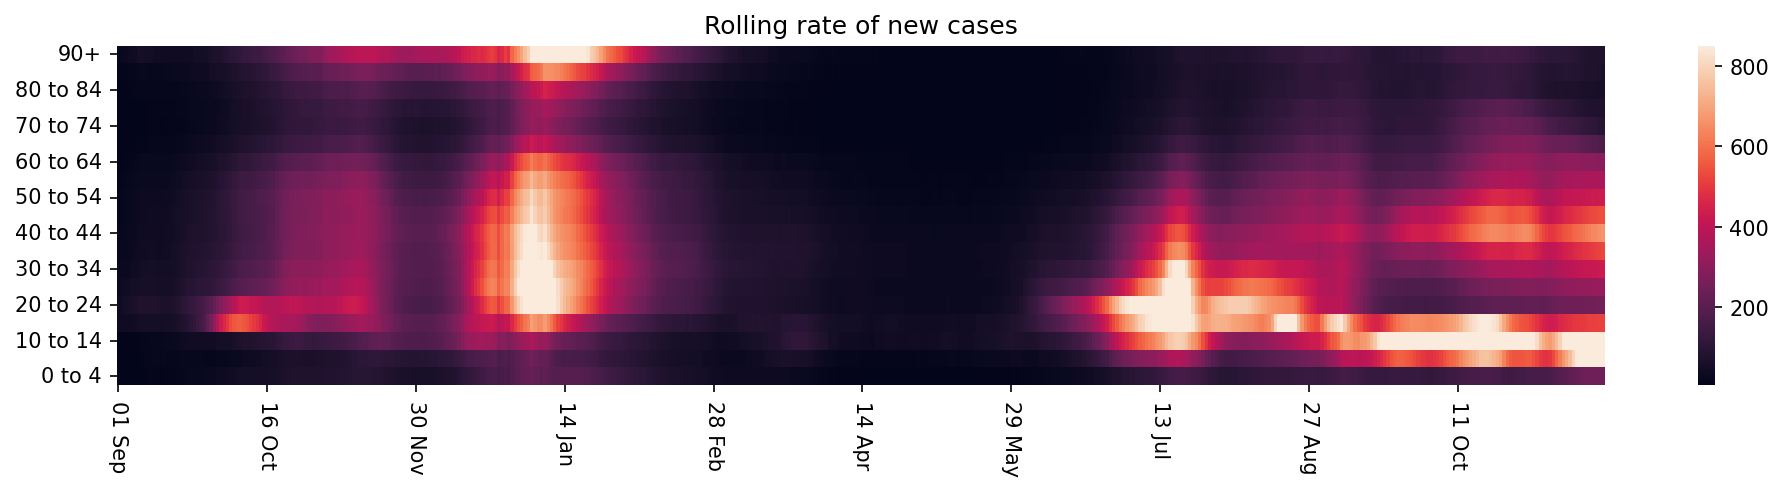

In [4]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2020-09')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

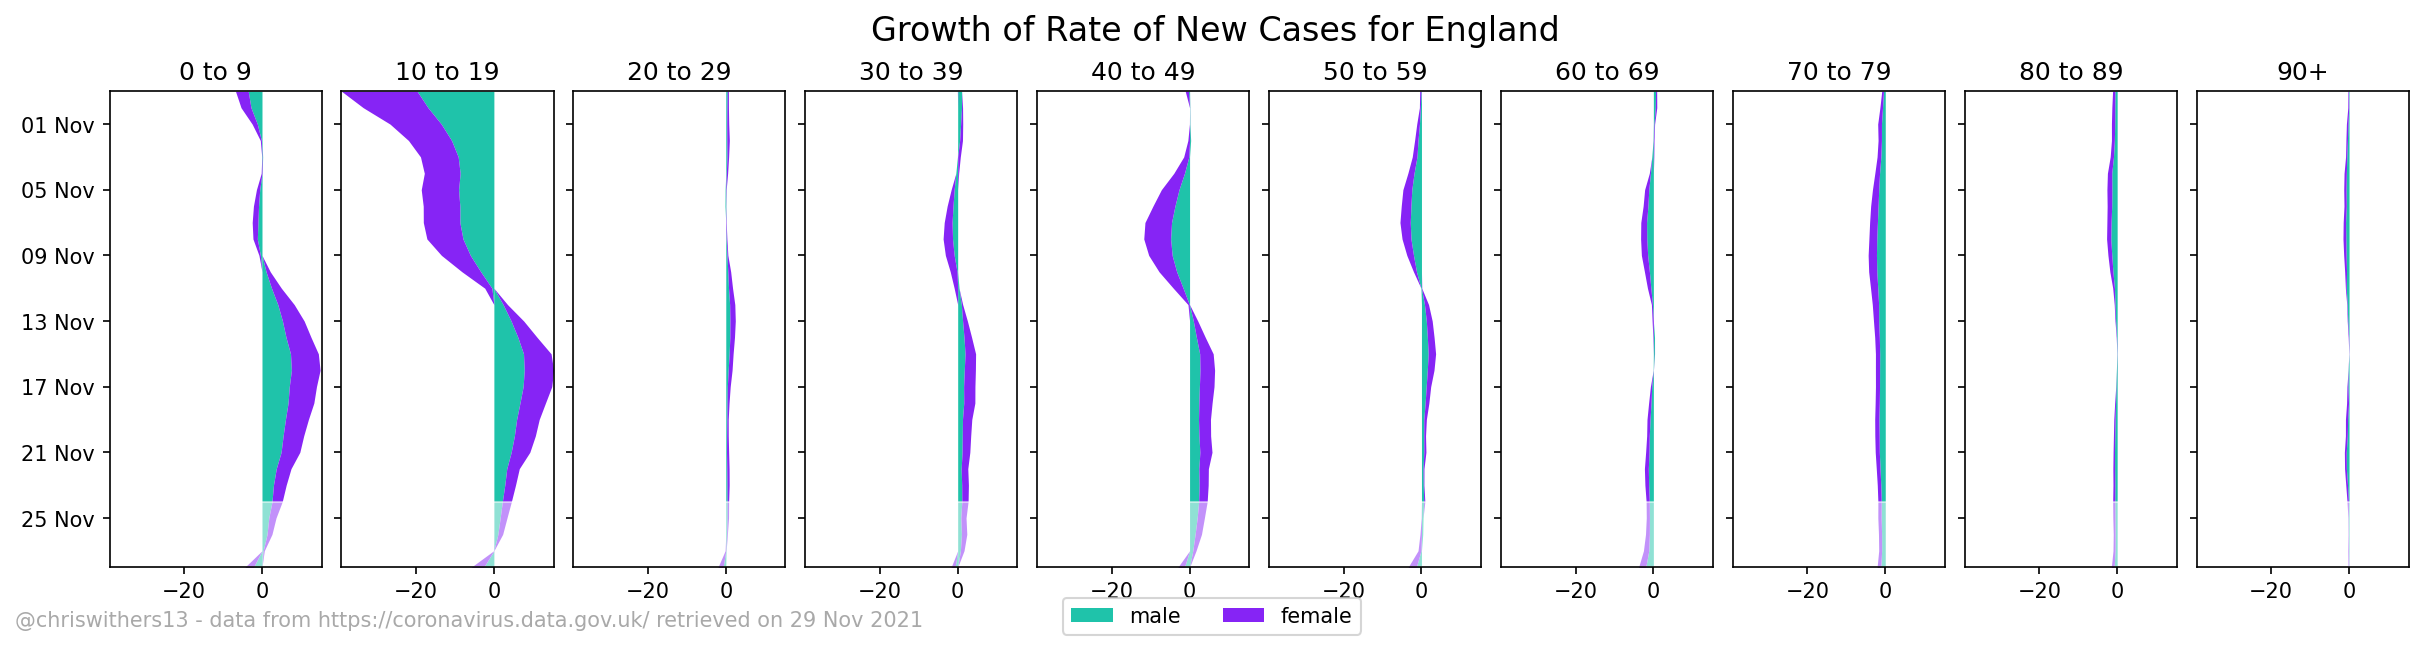

In [5]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

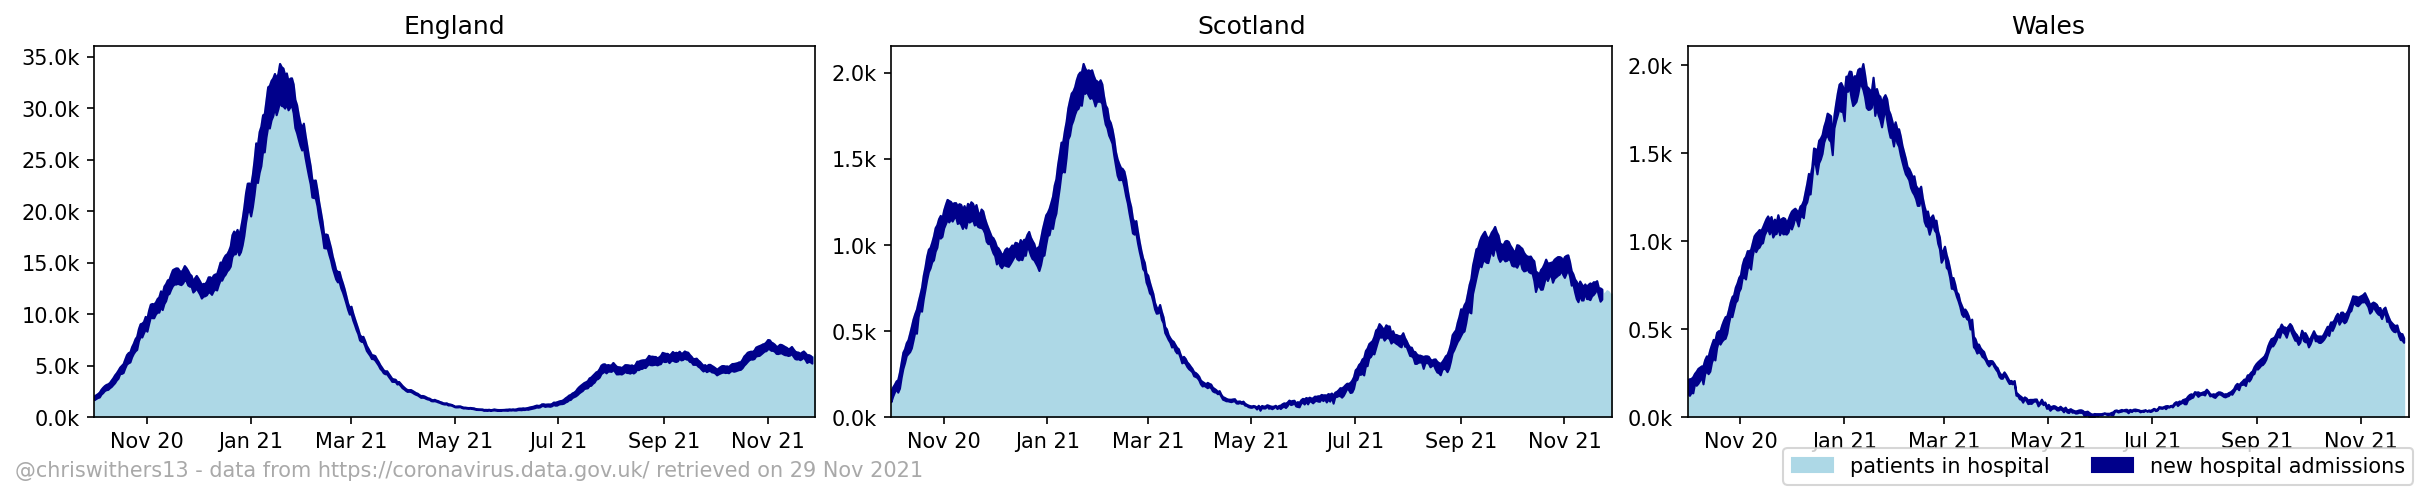

In [6]:
hospital_plot(start='2020-10', figsize=(16,3), figs=(1, 3))

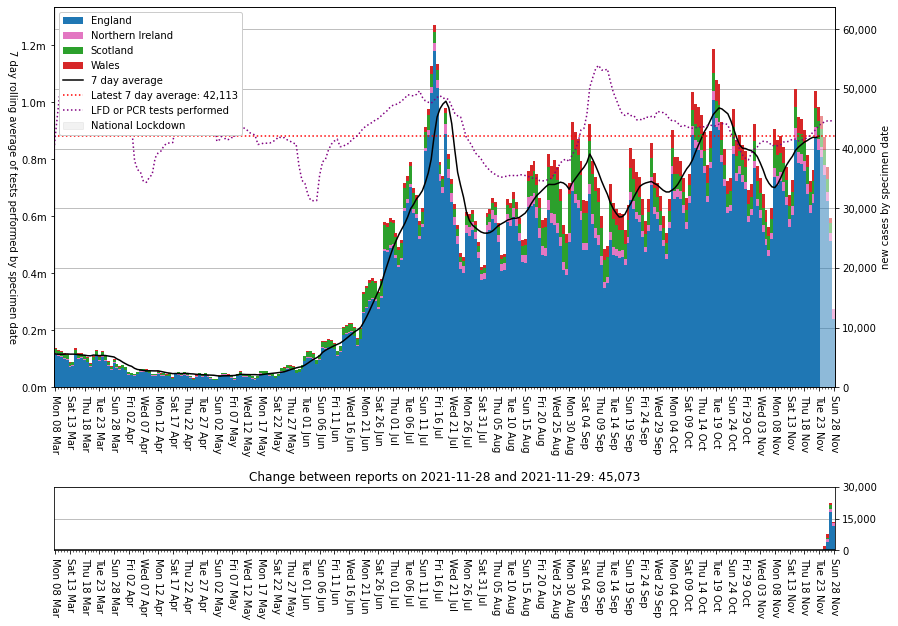

In [7]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b')

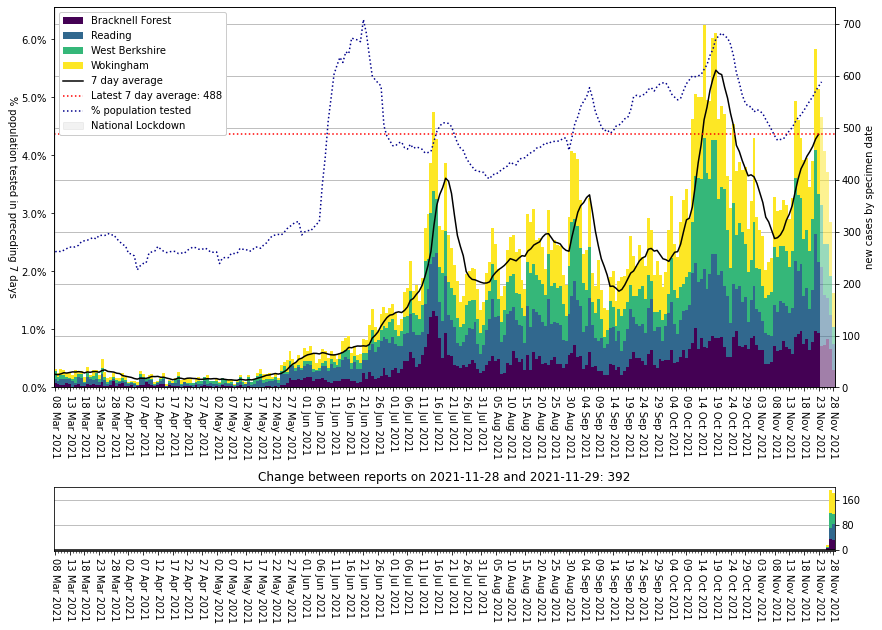

In [8]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

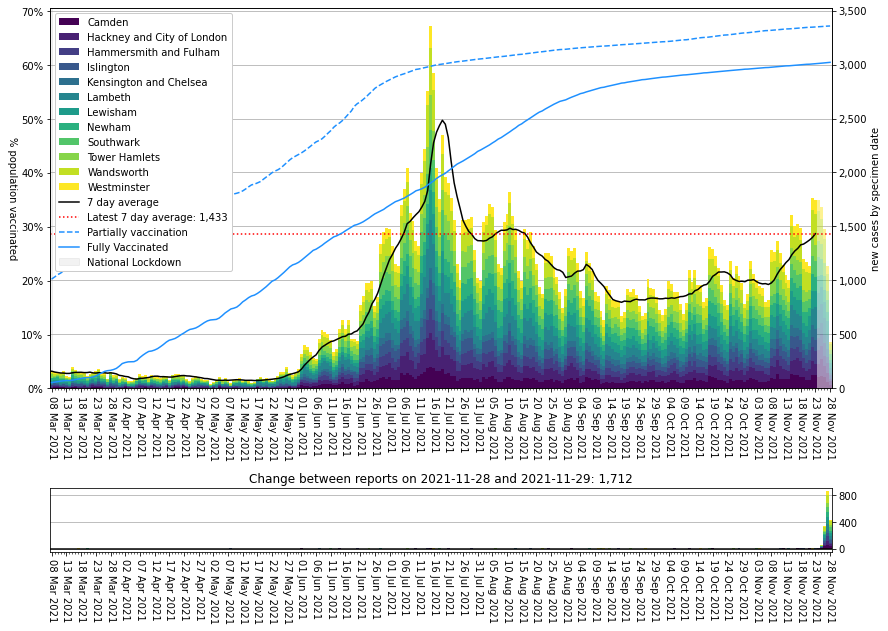

In [9]:
plot_areas(for_date, areas=london_areas, lines=population_vaccinated)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                 
E07000046                 Torridge          959.467971   
E07000207                Elmbridge          736.138017   
E07000043              North Devon          722.631118   
E07000228               Mid Sussex          715.789752   
E07000216                 Waverley          710.056361   
N09000001  Antrim and Newtownabbey          703.813134   
E07000007                  Wycombe          695.480524   
N09000009               Mid Ulster          684.046106   
W06000002                  Gwynedd          683.204881   
N09000010   Newry, Mourne and Down          680.384632   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E07000046                   655.0    2021-11-28  
E07000207                  1007.0    2021-11-28  
E07000043                   702.0    2021-11-28  
E07000228                  1081.0    2021-11-28  
E07000216                   897.0    2021-11-28  
N09000001                  1010.0    2021-11-28  
E07000007                  1212.0    2021-11-28  
N09000009                  1016.0    2021-11-28  
W06000002                   851.0    2021-11-28  
N09000010                  1234.0    2021-11-28

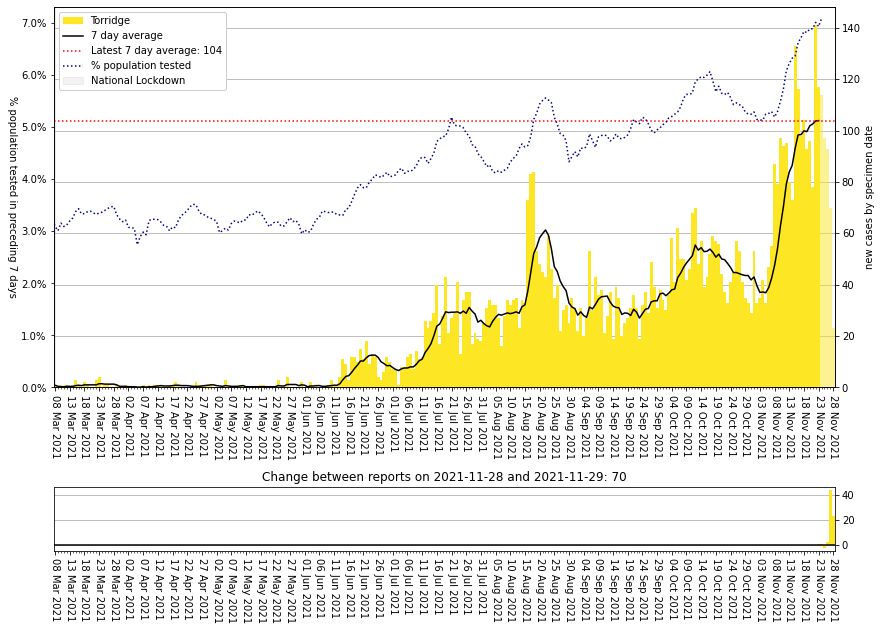

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                             
E08000025                           Birmingham          280.955951   
E06000052         Cornwall and Isles of Scilly          481.460366   
E06000054                            Wiltshire          456.578084   
E06000058  Bournemouth, Christchurch and Poole          540.559683   
E08000035                                Leeds          268.553179   
E06000059                               Dorset          523.106513   
N09000003                              Belfast          564.705334   
E06000047                        County Durham          329.186899   
E06000026                             Plymouth          630.675315   
E06000056                 Central Bedfordshire          555.347690   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E08000025                  3208.0    2021-11-28  
E06000052                  2753.0    2021-11-28  
E06000054                  2283.0    2021-11-28  
E06000058                  2137.0    2021-11-28  
E08000035                  2130.0    2021-11-28  
E06000059                  1980.0    2021-11-28  
N09000003                  1940.0    2021-11-28  
E06000047                  1745.0    2021-11-28  
E06000026                  1653.0    2021-11-28  
E06000056                  1603.0    2021-11-28

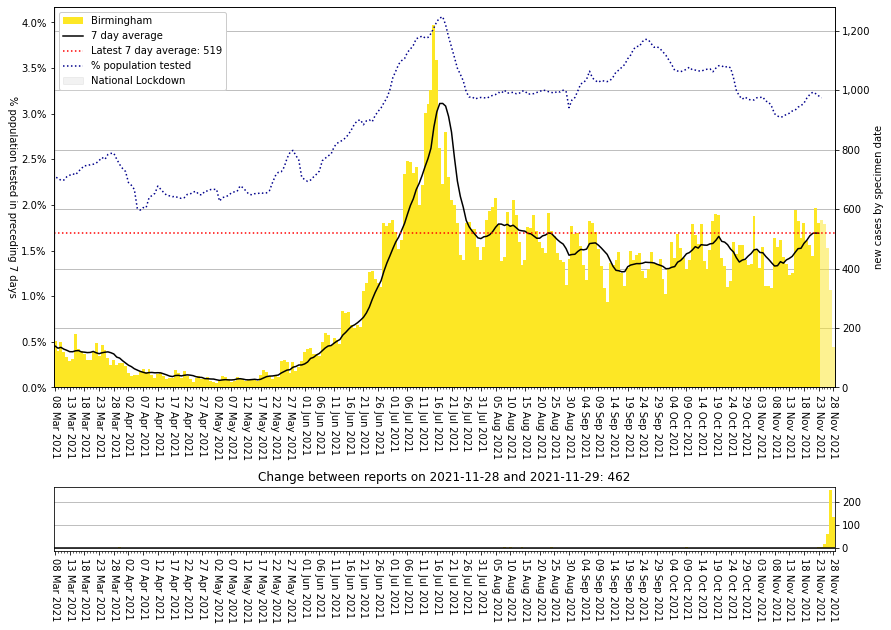

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

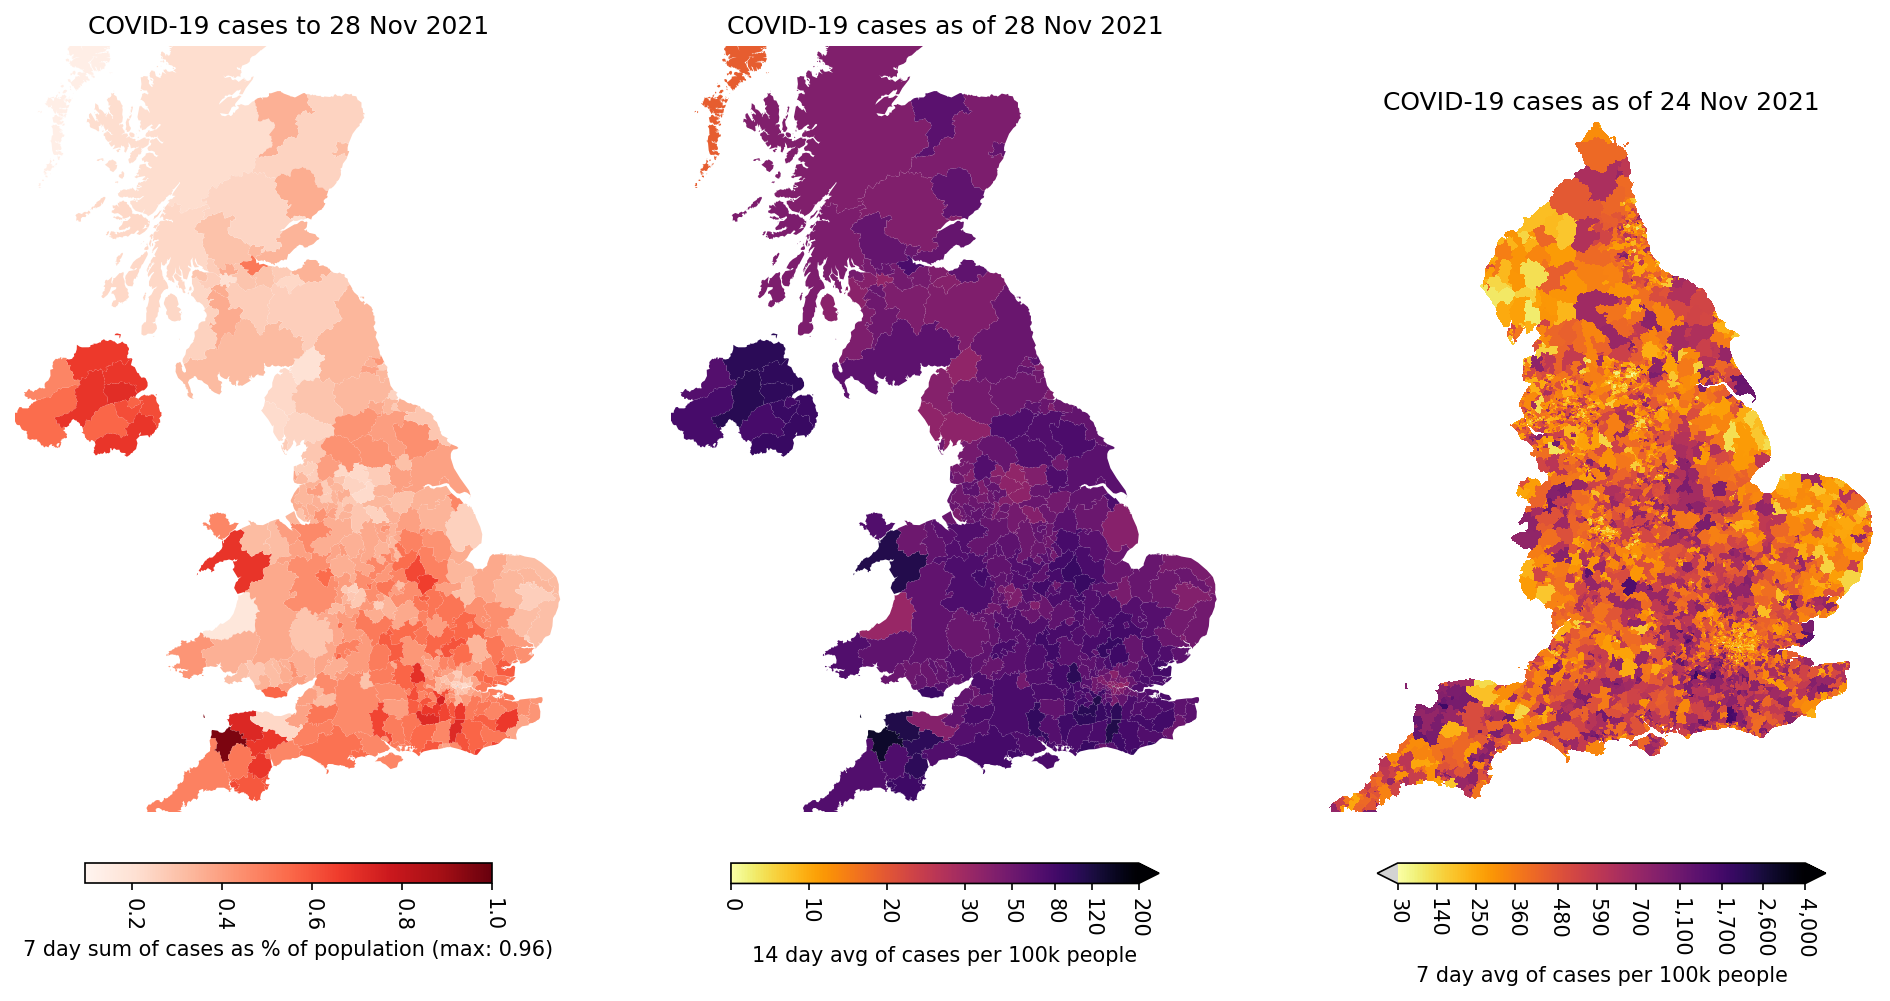

Loading BokehJS ...

In [15]:
case_maps(for_date, sum_vmax=1)

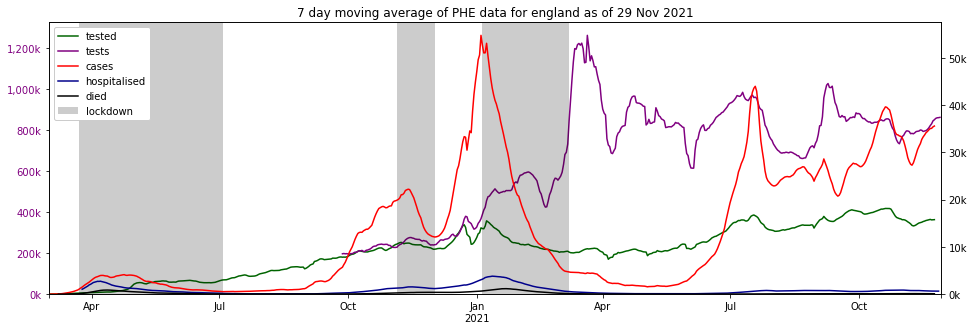

In [16]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

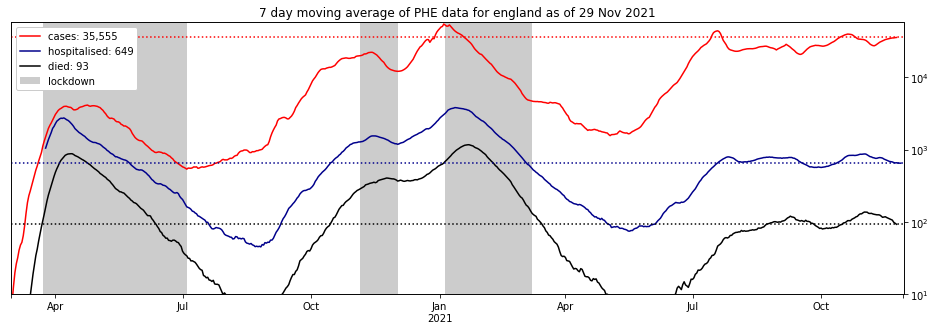

In [17]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))